<a href="https://colab.research.google.com/github/tekassh1/AI-Systems/blob/main/Lab3_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear regression

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

drive.mount("/content/drive")
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Colab Datasets/california_housing_train.csv")

plt.rcParams['figure.dpi'] = 600
plt.rcParams['savefig.dpi'] = 600
pd.set_option('display.max_columns', 11)
pd.set_option('display.width', 1200)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Print stats and graphs

print(df.describe())

df.hist(bins=70, figsize=(20, 15), color='dodgerblue', ec='white', linewidth=0.08)
plt.show()

          longitude      latitude  housing_median_age   total_rooms  total_bedrooms    population    households  median_income  median_house_value
count  17000.000000  17000.000000        17000.000000  17000.000000    17000.000000  17000.000000  17000.000000   17000.000000        17000.000000
mean    -119.562108     35.625225           28.589353   2643.664412      539.410824   1429.573941    501.221941       3.883578       207300.912353
std        2.005166      2.137340           12.586937   2179.947071      421.499452   1147.852959    384.520841       1.908157       115983.764387
min     -124.350000     32.540000            1.000000      2.000000        1.000000      3.000000      1.000000       0.499900        14999.000000
25%     -121.790000     33.930000           18.000000   1462.000000      297.000000    790.000000    282.000000       2.566375       119400.000000
50%     -118.490000     34.250000           29.000000   2127.000000      434.000000   1167.000000    409.000000       

In [ ]:
# Data preparation

df = df.dropna();             # empty rows
df = (df-df.mean())/df.std(); # normalization

# Split to train and test

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42);

Составим матрицу корреляции Пирсона для отбора признаков

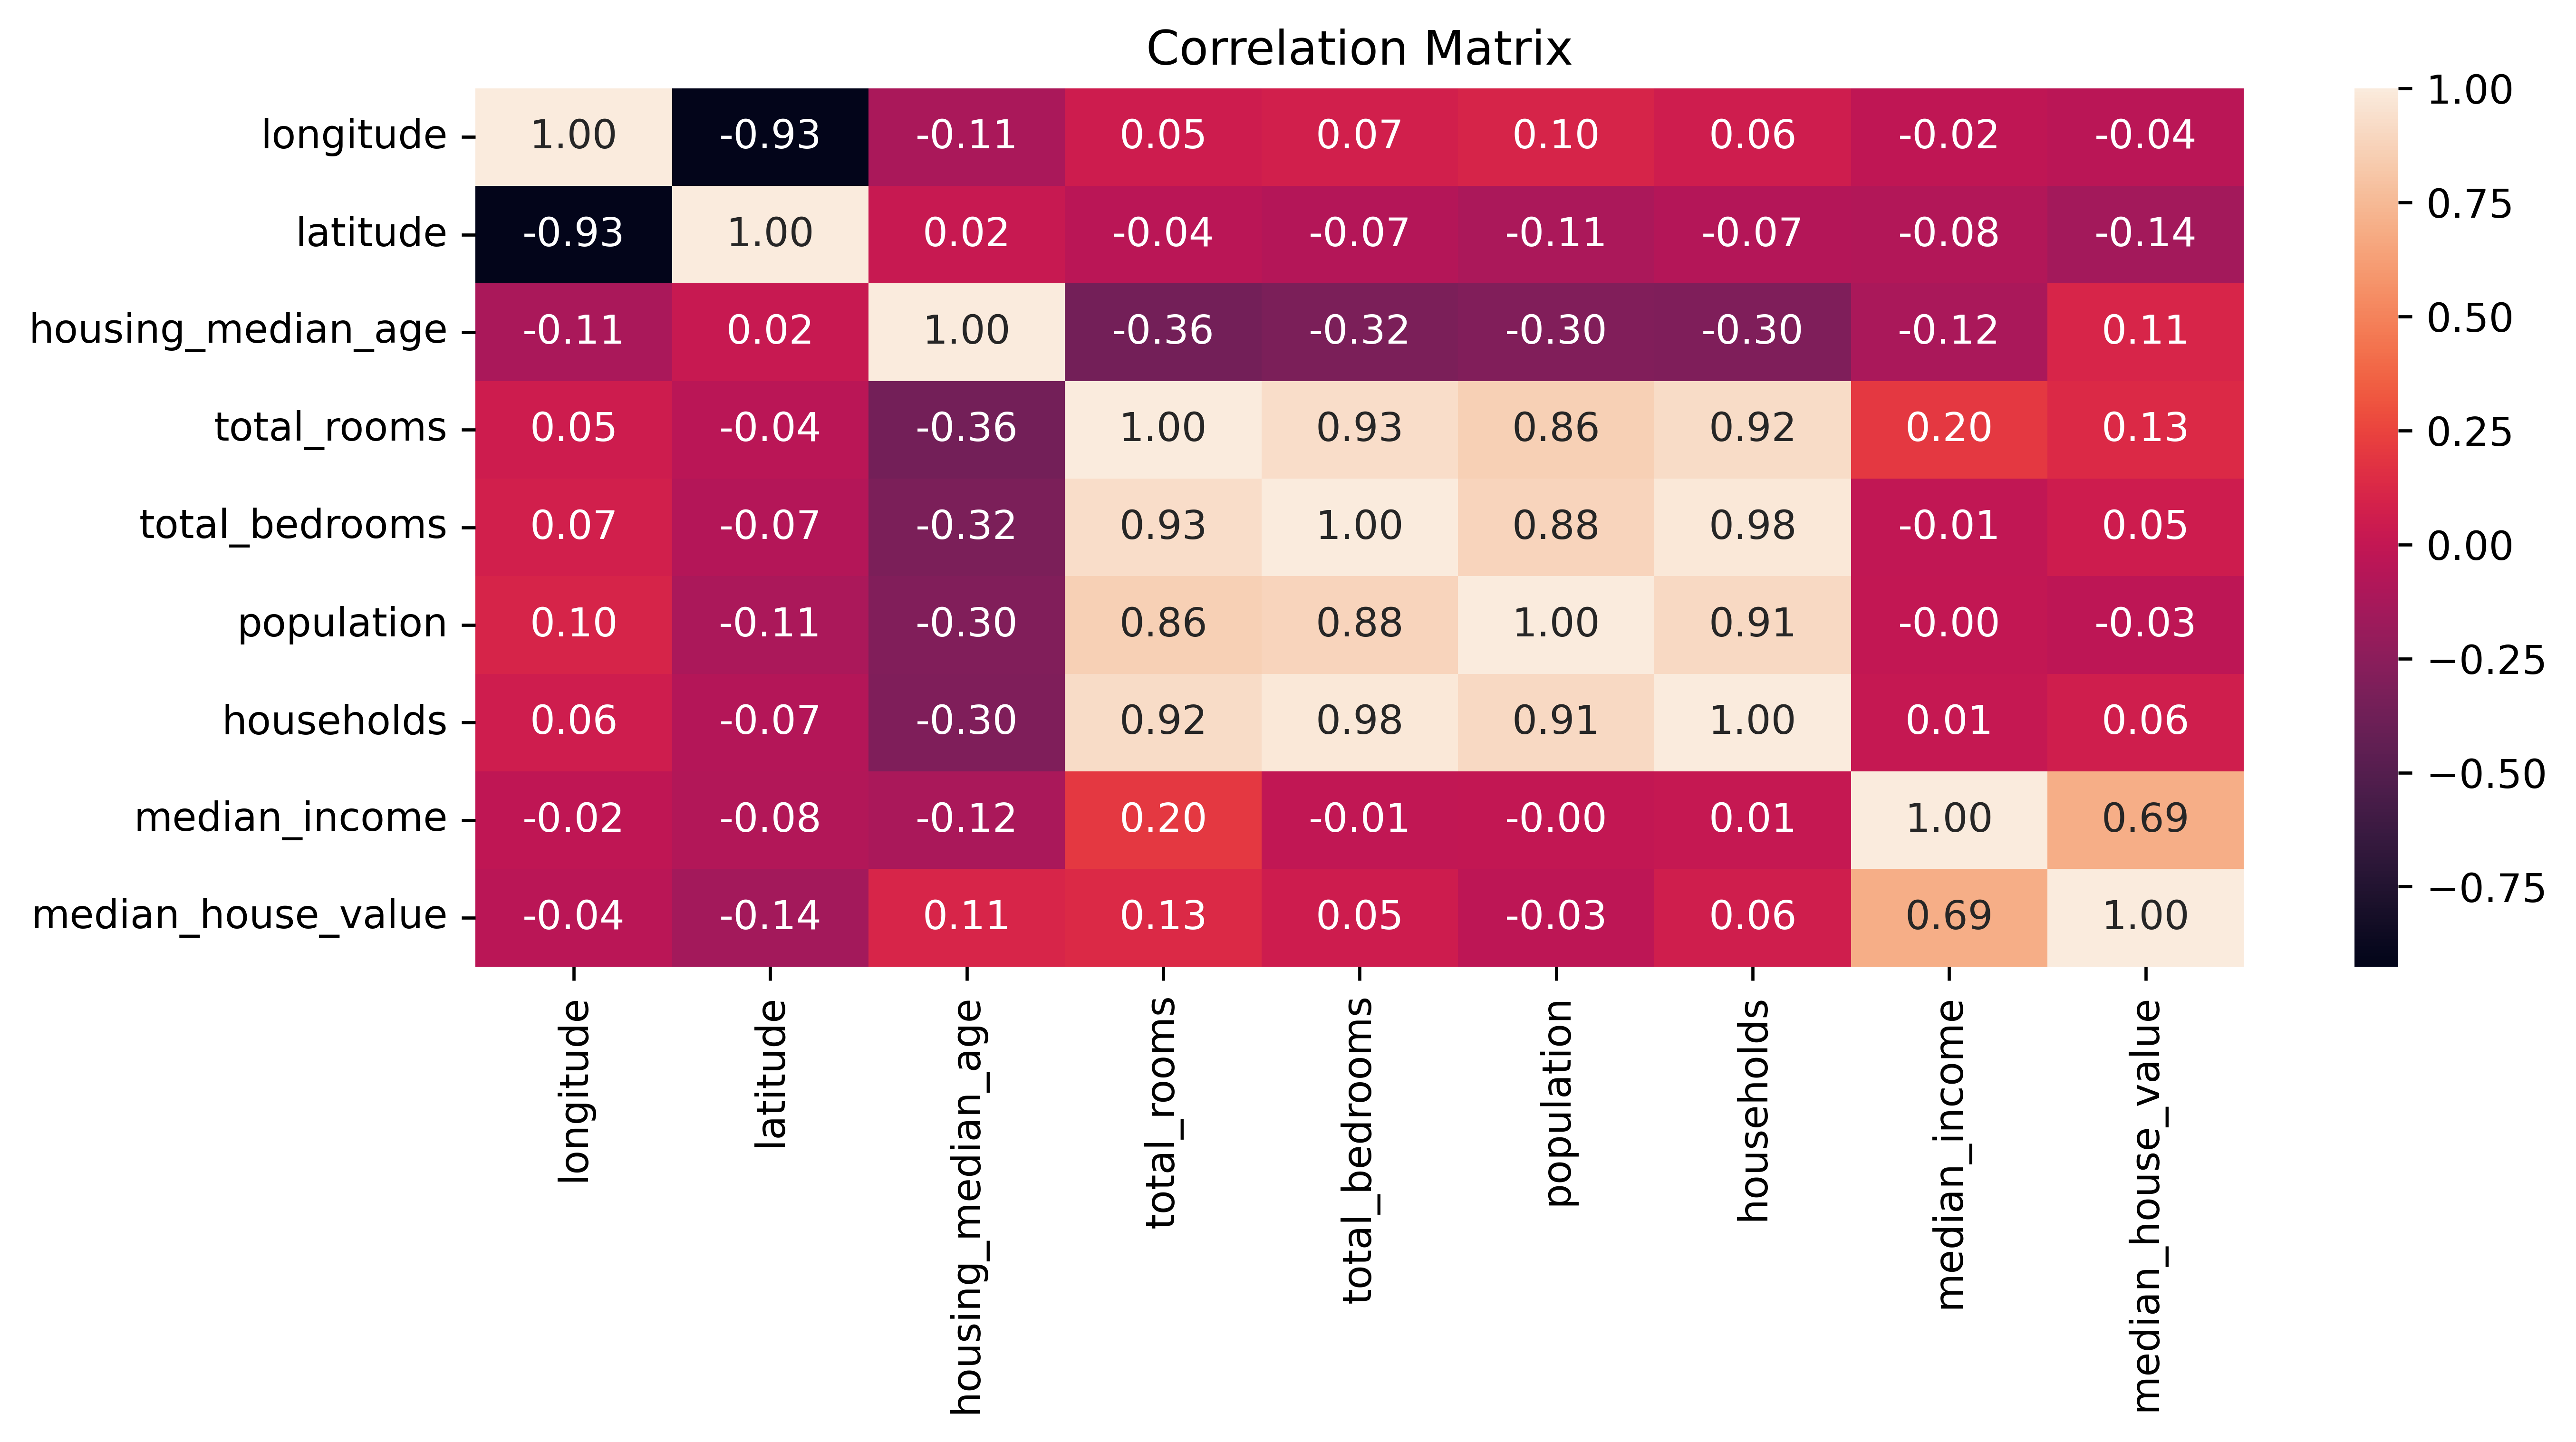

In [ ]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 4))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix')

plt.show()

**Исходя из матрицы выберем 3 набора признаков, корреляция между которыми ~ 0:**

**First set** - [longitude, housing_median_age, total_rooms, median_income]

**Second set** - [latitude, housing_median_age, population, median_income]

**Third set** - [longitude, latitude, total_rooms, total_bedrooms, population] - специально плохой набор признаков

Формула коэффициентов регрессии для матричной формы:

$\beta = (X^TX)^{-1}X^TY$

In [ ]:
Y = train_df[['median_house_value']].values.reshape(-1, 1)

# First model
X = train_df[["longitude", "housing_median_age", "total_rooms", "median_income"]].values
X = np.append(X, np.ones(len(X)).reshape(-1, 1), axis=1)

coefs_1 = (np.linalg.inv(X.T @ X) @ X.T @ Y )

# Second model
X = train_df[["latitude", "housing_median_age", "population", "median_income"]].values
X = np.append(X, np.ones(len(X)).reshape(-1, 1), axis=1)

coefs_2 = (np.linalg.inv(X.T @ X) @ X.T @ Y )

# Third model
X = train_df[["longitude", "latitude", "total_rooms", "total_bedrooms", "population"]].values
X = np.append(X, np.ones(len(X)).reshape(-1, 1), axis=1)

coefs_3 = (np.linalg.inv(X.T @ X) @ X.T @ Y )

# Zero model
X = train_df[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']].values
X = np.append(X, np.ones(len(X)).reshape(-1, 1), axis=1)

coefs_0 = (np.linalg.inv(X.T @ X) @ X.T @ Y )

def get_determination_coef(y_pred, y_orig):
    y_mean = np.mean(y_orig)
    sse = np.sum((y_orig - y_pred) ** 2)
    sst = np.sum((y_orig - y_mean) ** 2)
    return 1 - sse/sst

y_test = test_df.loc[:, 'median_house_value'].values.reshape(-1, 1)

x_test_1 = test_df[["longitude", "housing_median_age", "total_rooms", "median_income"]].values
x_test_1 = np.append(x_test_1, np.ones(len(x_test_1)).reshape(-1, 1), axis=1)

x_test_2 = test_df[["latitude", "housing_median_age", "population", "median_income"]].values
x_test_2 = np.append(x_test_2, np.ones(len(x_test_2)).reshape(-1, 1), axis=1)

x_test_3 = test_df[["longitude", "latitude", "total_rooms", "total_bedrooms", "population"]].values
x_test_3 = np.append(x_test_3, np.ones(len(x_test_3)).reshape(-1, 1), axis=1)

x_test_0 = test_df[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']].values
x_test_0 = np.append(x_test_0, np.ones(len(x_test_0)).reshape(-1, 1), axis=1)

y_pred_1 = x_test_1 @ coefs_1
y_pred_2 = x_test_2 @ coefs_2
y_pred_3 = x_test_3 @ coefs_3

y_pred_0 = x_test_0 @ coefs_0

print("Коэфициент детерминации для модели 1:", get_determination_coef(y_pred_1, y_test))
print("Коэфициент детерминации для модели 2:", get_determination_coef(y_pred_2, y_test))
print("Коэфициент детерминации для модели 3:", get_determination_coef(y_pred_3, y_test))                       # Показала худший результат, что логично
print("Коэфициент детерминации для модели 0 (со всеми признаками):", get_determination_coef(y_pred_0, y_test)) # Почему отработала лучше всех???

Коэфициент детерминации для модели 1: 0.5421372305347292
Коэфициент детерминации для модели 2: 0.5468939558958208
Коэфициент детерминации для модели 3: 0.3945058872889218
Коэфициент детерминации для модели 0 (со всеми признаками): 0.6636396350243802


Введём синтетический признак для модели:

In [ ]:
df["bedroom_income_corr"] =  df["median_income"] / df["total_bedrooms"]

Y = df[['median_house_value']].values

X = df.drop('median_house_value', axis=1)
X = df[["latitude", "housing_median_age", "population", "median_income", "bedroom_income_corr"]]

X = np.append(X, np.ones(len(X)).reshape(-1, 1), axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

coefs = (np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train)
Y_pred = X_test @ coefs

print("Коэфициент детерминации для модели с синтетическим признаком:", get_determination_coef(Y_pred, y_test))

Коэфициент детерминации для модели с синтетическим признаком: 0.5470049191492732
